In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta

# Set the random seed for reproducibility
np.random.seed(42)

# Number of orders to generate
num_orders = 500

# Generate random data for each column
order_data = {
    'OrderID': range(1, num_orders + 1),
    'CustomerID': np.random.randint(1, 101, size=num_orders),  # 100 unique customers
    'ProductCategory': np.random.choice(['Electronics', 'Clothing', 'Furniture', 'Beauty', 'Sports'], size=num_orders),
    'OrderDate': [datetime.now() - timedelta(days=np.random.randint(1, 100)) for _ in range(num_orders)],
    'Quantity': np.random.randint(1, 10, size=num_orders),
    'UnitPrice': np.round(np.random.uniform(10, 500, size=num_orders), 2),
    'PaymentMethod': np.random.choice(['Credit Card', 'PayPal', 'Bank Transfer'], size=num_orders),
    'CustomerLocation': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami'], size=num_orders),
    'OrderStatus': np.random.choice(['Completed', 'Returned', 'Canceled'], size=num_orders)
}

# Create a DataFrame
df = pd.DataFrame(order_data)

# Calculate TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Generate random DeliveryDate and calculate DeliveryTime
df['DeliveryDate'] = df.apply(lambda x: x['OrderDate'] + timedelta(days=np.random.randint(1, 10)), axis=1)
df['DeliveryTime'] = (df['DeliveryDate'] - df['OrderDate']).dt.days

# Display the first few rows
df.head(10)


,OrderID,CustomerID,ProductCategory,OrderDate,Quantity,UnitPrice,PaymentMethod,CustomerLocation,OrderStatus,TotalPrice,DeliveryDate,DeliveryTime
0,1,52,Beauty,2024-09-09 15:04:18.544022,7,169.05,PayPal,Miami,Canceled,1183.35,2024-09-11 15:04:18.544022,2
1,2,93,Clothing,2024-07-05 15:04:18.544118,1,189.57,PayPal,New York,Canceled,189.57,2024-07-14 15:04:18.544118,9
2,3,15,Furniture,2024-09-03 15:04:18.544139,8,204.12,PayPal,Houston,Completed,1632.96,2024-09-06 15:04:18.544139,3
3,4,72,Sports,2024-08-25 15:04:18.544153,3,350.78,Bank Transfer,Los Angeles,Canceled,1052.34,2024-08-27 15:04:18.544153,2
4,5,61,Electronics,2024-08-11 15:04:18.544164,2,200.39,Bank Transfer,Los Angeles,Completed,400.78,2024-08-19 15:04:18.544164,8
5,6,21,Sports,2024-08-14 15:04:18.544175,3,229.86,PayPal,Los Angeles,Canceled,689.58,2024-08-20 15:04:18.544175,6
6,7,83,Beauty,2024-06-16 15:04:18.544186,5,126.40,Bank Transfer,Houston,Completed,632.00,2024-06-22 15:04:18.544186,6
7,8,87,Sports,2024-06-15 15:04:18.544196,8,192.89,Credit Card,New York,Completed,1543.12,2024-06-22 15:04:18.544196,7
8,9,75,Electronics,2024-07-31 15:04:18.544206,7,121.36,Credit Card,Houston,Returned,849.52,2024-08-07 15:04:18.544206,7
9,10,75,Beauty,2024-07-11 15:04:18.544216,7,45.87,PayPal,Los Angeles,Canceled,321.09,2024-07-17 15:04:18.544216,6


In [ ]:
# Sales by Product Category
## This bar chart shows the total sales for each product category.

# Group by product category and calculate total sales
sales_by_category = df.groupby('ProductCategory')['TotalPrice'].sum()

# Plot the sales data in a bar chart with enhanced formatting
sales_by_category.plot(kind='bar', title='Total Sales by Product Category', color='skyblue', grid=True)
plt.xlabel('Product Category')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


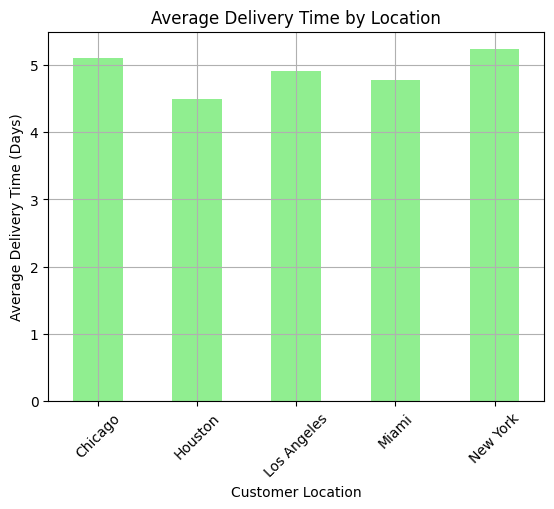

In [3]:
# Average Delivery Time by Location
## This bar chart shows the average delivery time by location.

# Group by customer location and calculate average delivery time
avg_delivery_time = df.groupby('CustomerLocation')['DeliveryTime'].mean()

# Plot average delivery time in a bar chart with enhanced formatting
avg_delivery_time.plot(kind='bar', title='Average Delivery Time by Location', color='lightgreen', grid=True)
plt.xlabel('Customer Location')
plt.ylabel('Average Delivery Time (Days)')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()


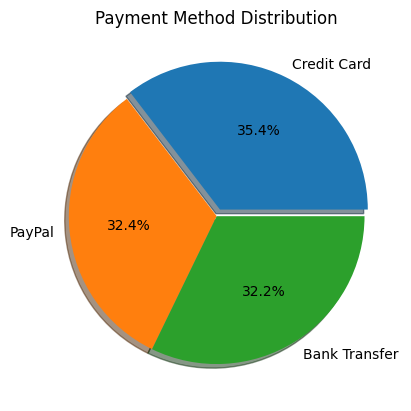

In [4]:
# Payment Method Distribution
## This pie chart shows the distribution of payment methods used by customers.

# Calculate the count of each payment method
payment_method_counts = df['PaymentMethod'].value_counts()

# Plot the payment method distribution in a pie chart with enhanced formatting
payment_method_counts.plot(kind='pie', autopct='%1.1f%%', shadow=True, explode=(0.05, 0, 0), title='Payment Method Distribution')
plt.ylabel('')  # Remove y-axis label for a cleaner look
plt.show()


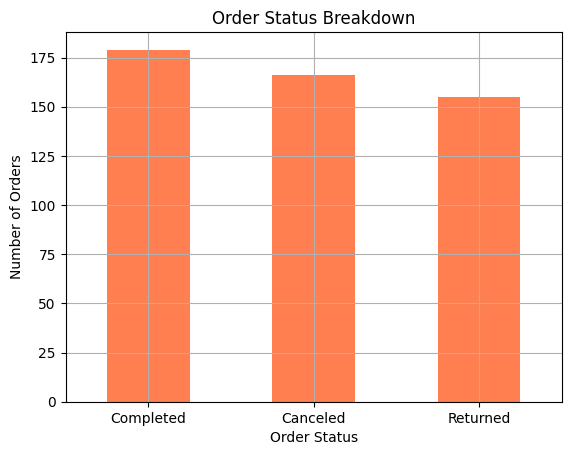

In [5]:
# Order Status Breakdown
## This bar chart shows the breakdown of order statuses (Completed, Returned, Canceled).

# Calculate the count of each order status
status_counts = df['OrderStatus'].value_counts()

# Plot the order status distribution in a bar chart with enhanced formatting
status_counts.plot(kind='bar', title='Order Status Breakdown', color='coral', grid=True)
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)  # Keep labels horizontal for readability
plt.show()
